In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
df = pd.read_csv('D:/College/sem 7/final year project/gith/AniSearch/anime.csv')
df = df.reset_index()
df.head()

,index,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url
0,0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...
1,1,100,Neon Genesis Evangelion,Shinseiki Evangelion,4.248,54463,"Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...","Emotional Abuse, Explicit Violence, Mature The...",TV,26,True,Unknown,1995,1996,Fall 1995,"GAINAX, Tatsunoko Production","In the future, a devastating event known as Se...",https://www.anime-planet.com/anime/neon-genesi...
2,2,1000,Full Metal Panic! The Second Raid,Unknown,4.35,23948,"Action, Comedy, Mecha, Sci Fi, Shounen, Milita...","Explicit Violence, Nudity",TV,13,True,Unknown,2005,2005,Summer 2005,Kyoto Animation,Half a year has passed since Sousuke Sagara to...,https://www.anime-planet.com/anime/full-metal-...
3,3,10000,22/7: Shampoo no Nioi ga Shita,Unknown,2.8,131,"Idols, School Life, CG Animation",Unknown,Music,1,True,5,2018,2018,Unknown,Unknown,The idol group 22/7 perform the song Shampoo n...,https://www.anime-planet.com/anime/22-7-shampo...
4,4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,Unknown,1.271,21,Family Friendly,Unknown,Web,1,True,2,2017,2017,Unknown,Toei Animation,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/oshiri-tant...


In [37]:
df.columns

Index(['index', 'Anime-PlanetID', 'Name', 'Alternative Name', 'Rating Score',
       'Number Votes', 'Tags', 'Content Warning', 'Type', 'Episodes',
       'Finished', 'Duration', 'StartYear', 'EndYear', 'Season', 'Studios',
       'Synopsis', 'Url'],
      dtype='object')

### Plotting top 10 anime of all time (based on Rating-Score)

In [38]:
features = ['Rating Score','Number Votes','Studios','Synopsis', 'Tags', 'Episodes']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches

# Load the CSV file (Assumed the filename is provided)
# df = pd.read_csv('path_to_csv')

# Step 1: Data Cleaning and Preparation
# Drop rows with missing values
df = df.dropna()

# Convert 'Rating Score' and 'Number Votes' to float
# If conversion fails, replace invalid values with NaN and drop them
for col in ['Rating Score', 'Number Votes']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['Rating Score', 'Number Votes'])

# Fill NaN values in categorical and textual features with default values
df['Tags'] = df['Tags'].fillna('')
df['Studios'] = df['Studios'].fillna('')
df['Type'] = df['Type'].fillna('Unknown')
df['Synopsis'] = df['Synopsis'].fillna('')

# Step 2: Feature Engineering
# Standardize 'Number Votes'
scaler = StandardScaler()
df['Number Votes Scaled'] = scaler.fit_transform(df[['Number Votes']])

# TF-IDF Vectorization for Tags and Synopsis
tag_vectorizer = TfidfVectorizer(stop_words='english', max_features=600)
df_tag_matrix = tag_vectorizer.fit_transform(df['Tags']).toarray()

synopsis_vectorizer = TfidfVectorizer(stop_words='english', max_features=1500)
df_synopsis_matrix = synopsis_vectorizer.fit_transform(df['Synopsis']).toarray()

# One-Hot Encoding for Studios and Type
encoder = OneHotEncoder()
studios_encoded = encoder.fit_transform(df[['Studios']]).toarray()
type_encoded = encoder.fit_transform(df[['Type']]).toarray()

# Combine all features into a single matrix
features_combined = np.hstack([df[['Number Votes Scaled']].values, df_tag_matrix, df_synopsis_matrix, studios_encoded, type_encoded])

# Step 3: Cosine Similarity Calculation
cv = CountVectorizer()
df['combined_feature'] = df.apply(lambda row: f"{row['Rating Score']} {row['Number Votes']} {row['Studios']} {row['Synopsis']} {row['Tags']} {row['Episodes']}", axis=1)
count_matrix = cv.fit_transform(df['combined_feature'])
cosine_sim = cosine_similarity(count_matrix)

# Step 4: Anime Recommendation System
def get_index_from_title(title):
    title = title.strip().lower()
    df['Name'] = df['Name'].str.strip().str.lower()
    matches = get_close_matches(title, df['Name'], n=1, cutoff=0.8)
    if matches:
        return df[df['Name'] == matches[0]].index[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

def get_title_from_index(index):
    return df.iloc[index]['Name']

# Example: Recommending similar anime
anime_liked = "naruto"  # Replace with actual input
try:
    liked_movie_index = cosine_sim[get_index_from_title(anime_liked)]
    similar_anime = list(enumerate(liked_movie_index))
    similar_anime.sort(key=lambda row: row[1], reverse=True)
    
    print("Top 15 Recommended Anime:")
    for i in range(15):
        print(get_title_from_index(similar_anime[i][0]))
except Exception as e:
    print(f"Error: {e}")


Top 15 Recommended Anime:
green green
starry☆sky
haru no ashioto the movie: ourin dakkan
armed girl’s machiavellism
green green ova
prison school
mashiroiro symphony: the color of lovers
in search of the lost future
yotsunoha
azumanga web daioh
k-on!
ufo ultramaiden valkyrie 4: banquet of time, dreams, and galaxies
maid-sama!
chivalry of a failed knight
gakuen heaven


In [50]:
anime_liked = "naruto"


In [51]:
cosine_sim = cosine_similarity(count_matrix)
from difflib import get_close_matches


def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
    if matches:
        title = matches[0]  
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

try:
    liked_movie_index = cosine_sim[get_index_from_title(anime_liked)]
    similar_anime = list(enumerate(liked_movie_index))
    similar_anime.sort(key=lambda row: row[1], reverse=True)
    for i in range(15):
        print(get_title_from_index(similar_anime[i][0]))
except Exception as e:
    print(f"Error: {e}")


green green
starry☆sky
haru no ashioto the movie: ourin dakkan
armed girl’s machiavellism
green green ova
prison school
mashiroiro symphony: the color of lovers
in search of the lost future
yotsunoha
azumanga web daioh
k-on!
ufo ultramaiden valkyrie 4: banquet of time, dreams, and galaxies
maid-sama!
chivalry of a failed knight
gakuen heaven


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Fill NaN values with empty strings
df['Tags'] = df['Tags'].fillna('')
df['Studios'] = df['Studios'].fillna('')
df['Type'] = df['Type'].fillna('Unknown')
df['Synopsis'] = df['Synopsis'].fillna('')  # Ensure no NaN values in synopsis

# Convert 'Number Votes' to numeric and scale it
df['Number Votes'] = pd.to_numeric(df['Number Votes'], errors='coerce').fillna(0)
scaler = StandardScaler()
scaled_votes = scaler.fit_transform(df[['Number Votes']])

# TF-IDF Vectorization for Tags
tag_vectorizer = TfidfVectorizer(stop_words='english', max_features=600)
tag_matrix = tag_vectorizer.fit_transform(df['Tags']).toarray()

# TF-IDF Vectorization for Synopsis
synopsis_vectorizer = TfidfVectorizer(stop_words='english', max_features=1500)  # More features for better representation
synopsis_matrix = synopsis_vectorizer.fit_transform(df['Synopsis']).toarray()

# One-Hot Encoding for Studios and Type
encoder = OneHotEncoder()
studios_encoded = encoder.fit_transform(df[['Studios']]).toarray()
type_encoded = encoder.fit_transform(df[['Type']]).toarray()

# Combine all features
features_combined = np.hstack([scaled_votes, tag_matrix, synopsis_matrix, studios_encoded, type_encoded])

print("Feature matrix shape:", features_combined.shape)


Feature matrix shape: (14391, 3081)


##### KNN using minkowski (without normalization)

### p=3

In [53]:
# from scipy.spatial.distance import cdist
# from difflib import get_close_matches
# import numpy as np

# # Function to get index of an anime from its title
# def get_index_from_title(title):
#     title = title.strip().lower()
#     df["Name"] = df["Name"].str.strip().str.lower()
#     matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
#     if matches:
#         title = matches[0]
#         return df[df["Name"] == title]["index"].values[0]
#     else:
#         raise ValueError(f"No close matches found for '{title}'.")

# try:
#     liked_movie_index = get_index_from_title(anime_liked)
    
#     # Compute Minkowski Distance for all anime (p=3)
#     similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=3).flatten()
    
#     similar_anime = list(enumerate(similarity_scores))
#     similar_anime.sort(key=lambda row: row[1])  # Lower distance means higher similarity
    
#     print(f"Anime similar to '{anime_liked}' based on Minkowski Distance (p=3):\n")
#     for i in range(15):
#         anime_name = get_title_from_index(similar_anime[i][0])
#         distance = similar_anime[i][1]
#         similarity_score = 1 / (1 + distance)  # Convert distance to similarity
#         print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")

# except Exception as e:
#     print(f"Error: {e}")




### p=2.5

In [54]:
# from scipy.spatial.distance import cdist
# from difflib import get_close_matches
# import numpy as np

# # Function to get index of an anime from its title
# def get_index_from_title(title):
#     title = title.strip().lower()
#     df["Name"] = df["Name"].str.strip().str.lower()
#     matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
#     if matches:
#         title = matches[0]
#         return df[df["Name"] == title]["index"].values[0]
#     else:
#         raise ValueError(f"No close matches found for '{title}'.")

# try:
#     liked_movie_index = get_index_from_title(anime_liked)
    
#     # Compute Minkowski Distance for all anime (p=3)
#     similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=2.5).flatten()
    
#     similar_anime = list(enumerate(similarity_scores))
#     similar_anime.sort(key=lambda row: row[1])  # Lower distance means higher similarity
    
#     print(f"Anime similar to '{anime_liked}' based on Minkowski Distance (p=3):\n")
#     for i in range(15):
#         anime_name = get_title_from_index(similar_anime[i][0])
#         distance = similar_anime[i][1]
#         similarity_score = 1 / (1 + distance)  # Convert distance to similarity
#         print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")

# except Exception as e:
#     print(f"Error: {e}")




### p=3.5

In [55]:
# from scipy.spatial.distance import cdist
# from difflib import get_close_matches
# import numpy as np

# # Function to get index of an anime from its title
# def get_index_from_title(title):
#     title = title.strip().lower()
#     df["Name"] = df["Name"].str.strip().str.lower()
#     matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
#     if matches:
#         title = matches[0]
#         return df[df["Name"] == title]["index"].values[0]
#     else:
#         raise ValueError(f"No close matches found for '{title}'.")

# try:
#     liked_movie_index = get_index_from_title(anime_liked)
    
#     # Compute Minkowski Distance for all anime (p=3)
#     similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=3.5).flatten()
    
#     similar_anime = list(enumerate(similarity_scores))
#     similar_anime.sort(key=lambda row: row[1])  # Lower distance means higher similarity
    
#     print(f"Anime similar to '{anime_liked}' based on Minkowski Distance (p=3):\n")
#     for i in range(15):
#         anime_name = get_title_from_index(similar_anime[i][0])
#         distance = similar_anime[i][1]
#         similarity_score = 1 / (1 + distance)  # Convert distance to similarity
#         print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")

# except Exception as e:
#     print(f"Error: {e}")




### p=4

In [56]:
# from scipy.spatial.distance import cdist
# from difflib import get_close_matches
# import numpy as np

# # Function to get index of an anime from its title
# def get_index_from_title(title):
#     title = title.strip().lower()
#     df["Name"] = df["Name"].str.strip().str.lower()
#     matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
#     if matches:
#         title = matches[0]
#         return df[df["Name"] == title]["index"].values[0]
#     else:
#         raise ValueError(f"No close matches found for '{title}'.")

# try:
#     liked_movie_index = get_index_from_title(anime_liked)
    
#     # Compute Minkowski Distance for all anime (p=3)
#     similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=4).flatten()
    
#     similar_anime = list(enumerate(similarity_scores))
#     similar_anime.sort(key=lambda row: row[1])  # Lower distance means higher similarity
    
#     print(f"Anime similar to '{anime_liked}' based on Minkowski Distance (p=3):\n")
#     for i in range(15):
#         anime_name = get_title_from_index(similar_anime[i][0])
#         distance = similar_anime[i][1]
#         similarity_score = 1 / (1 + distance)  # Convert distance to similarity
#         print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")

# except Exception as e:
#     print(f"Error: {e}")




##### KNN using minkowski (with normalization)

In [57]:
# from scipy.spatial.distance import cdist
# from difflib import get_close_matches
# import numpy as np

# # Function to get index of an anime from its title
# def get_index_from_title(title):
#     title = title.strip().lower()
#     df["Name"] = df["Name"].str.strip().str.lower()
#     matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
#     if matches:
#         title = matches[0]
#         return df[df["Name"] == title]["index"].values[0]
#     else:
#         raise ValueError(f"No close matches found for '{title}'.")
# # With Normalization
# try:
#     liked_movie_index = get_index_from_title(anime_liked)
    
#     # Compute Minkowski Distance for all anime (p=3)
#     similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=3).flatten()
    
#     # Find Min & Max for Normalization
#     min_distance = np.min(similarity_scores)
#     max_distance = np.max(similarity_scores)
    
#     similar_anime = list(enumerate(similarity_scores))
#     similar_anime.sort(key=lambda row: row[1])  # Lower distance means higher similarity
    
#     print(f"Anime similar to '{anime_liked}' based on Normalized Minkowski Distance (p=3):\n")
#     for i in range(15):
#         anime_name = get_title_from_index(similar_anime[i][0])
#         raw_distance = similar_anime[i][1]
#         normalized_distance = (raw_distance - min_distance) / (max_distance - min_distance)
#         normalized_similarity = 1 - normalized_distance
#         print(f"{anime_name} - \t\tDistance: {normalized_distance:.4f}, \t\tSimilarity: {normalized_similarity:.4f}")

# except Exception as e:
#     print(f"Error: {e}")

In [ ]:
# from scipy.spatial.distance import cdist
# from difflib import get_close_matches
# import numpy as np

# # Function to get index of an anime from its title
# def get_index_from_title(title):
#     title = title.strip().lower()
#     df["Name"] = df["Name"].str.strip().str.lower()
#     matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
#     if matches:
#         title = matches[0]
#         return df[df["Name"] == title]["index"].values[0]
#     else:
#         raise ValueError(f"No close matches found for '{title}'.")

# # List of p values to test
# p_values = [1, 2, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 10, float('inf')]

# try:
#     liked_movie_index = get_index_from_title(anime_liked)
    
#     for p in p_values:
#         print(f"\nAnime similar to '{anime_liked}' based on Minkowski Distance (p={p}):\n")
        
#         # Compute Minkowski Distance for all anime
#         similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=p).flatten()
        
#         # Sort by increasing distance (lower distance = more similar)
#         similar_anime = list(enumerate(similarity_scores))
#         similar_anime.sort(key=lambda row: row[1])
        
#         for i in range(10):  # Display top 15 recommendations
#             anime_name = get_title_from_index(similar_anime[i][0])
#             distance = similar_anime[i][1]
#             similarity_score = 1 / (1 + distance)  # Convert distance to similarity
#             print(f"{anime_name} - \t\tDistance: {distance:.6f}, \t\tSimilarity: {similarity_score:.6f}")
        
# except Exception as e:
#     print(f"Error: {e}")



Anime similar to 'naruto' based on Minkowski Distance (p=1):

green green - 		Distance: 0.0000, 		Similarity: 1.0000
haikyuu!! to the top: part ii - 		Distance: 11.9930, 		Similarity: 0.0770
the disappearance of nagato yuki-chan - 		Distance: 12.0504, 		Similarity: 0.0766
tokyo ghoul:re 2nd season - 		Distance: 12.8048, 		Similarity: 0.0724
green green thirteen: erolutions - 		Distance: 12.8247, 		Similarity: 0.0723
mushishi zoku shou 2nd season - 		Distance: 12.8529, 		Similarity: 0.0722
armed girl’s machiavellism - 		Distance: 12.9150, 		Similarity: 0.0719
the fruit of grisaia - 		Distance: 13.0097, 		Similarity: 0.0714
girls und panzer: introductions! - 		Distance: 13.0378, 		Similarity: 0.0712
chiisana viking vickie - 		Distance: 13.0678, 		Similarity: 0.0711

Anime similar to 'naruto' based on Minkowski Distance (p=2):

green green - 		Distance: 0.0000, 		Similarity: 1.0000
the fruit of grisaia - 		Distance: 2.1065, 		Similarity: 0.3219
baka and test - summon the beasts 2 - 		Dis

In [ ]:
from scipy.spatial.distance import cdist
from difflib import get_close_matches
import numpy as np

# Function to get index of an anime from its title
def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
    if matches:
        title = matches[0]
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

# List of p values to test
p_values = [1, 2, 3, 4, 5, 10, float('inf')]

try:
    liked_movie_index = get_index_from_title(anime_liked)
    
    for p in p_values:
        print(f"\nAnime similar to '{anime_liked}' based on Minkowski Distance (p={p}):\n")
        
        # Compute Minkowski Distance for all anime
        similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=p).flatten()
        
        # Sort by increasing distance (lower distance = more similar)
        similar_anime = list(enumerate(similarity_scores))
        similar_anime.sort(key=lambda row: row[1])
        
        for i in range(15):  # Display top 15 recommendations
            anime_name = get_title_from_index(similar_anime[i][0])
            distance = similar_anime[i][1]
            similarity_score = 1 / (1 + distance)  # Convert distance to similarity
            print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")
        
except Exception as e:
    print(f"Error: {e}")



Anime similar to 'naruto' based on Minkowski Distance (p=1):

green green - 		Distance: 0.0000, 		Similarity: 1.0000
haikyuu!! to the top: part ii - 		Distance: 11.9930, 		Similarity: 0.0770
the disappearance of nagato yuki-chan - 		Distance: 12.0504, 		Similarity: 0.0766
tokyo ghoul:re 2nd season - 		Distance: 12.8048, 		Similarity: 0.0724
green green thirteen: erolutions - 		Distance: 12.8247, 		Similarity: 0.0723
mushishi zoku shou 2nd season - 		Distance: 12.8529, 		Similarity: 0.0722
armed girl’s machiavellism - 		Distance: 12.9150, 		Similarity: 0.0719
the fruit of grisaia - 		Distance: 13.0097, 		Similarity: 0.0714
girls und panzer: introductions! - 		Distance: 13.0378, 		Similarity: 0.0712
chiisana viking vickie - 		Distance: 13.0678, 		Similarity: 0.0711
mashiroiro symphony: the color of lovers - 		Distance: 13.0961, 		Similarity: 0.0709
absolute duo - 		Distance: 13.2109, 		Similarity: 0.0704
kakegurui xx - 		Distance: 13.3585, 		Similarity: 0.0696
walkure romanze - 		Distan

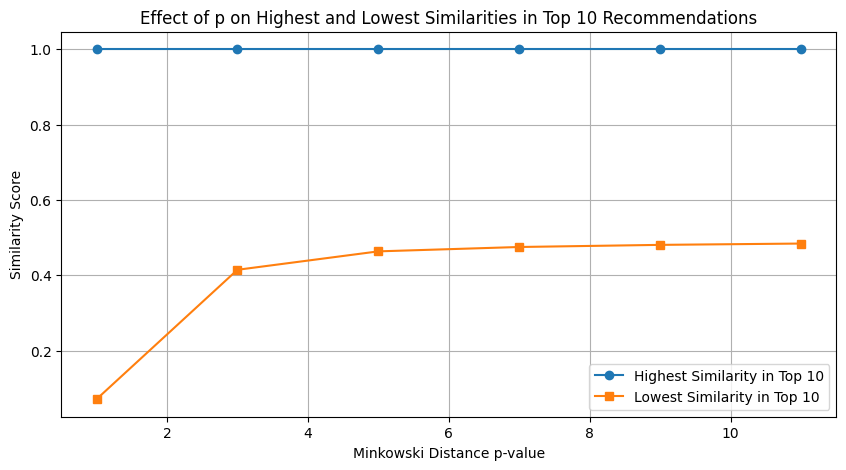

In [68]:
from scipy.spatial.distance import cdist
from difflib import get_close_matches
import numpy as np
import matplotlib.pyplot as plt

# Function to get index of an anime from its title
def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
    if matches:
        title = matches[0]
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

# List of p values to test
p_values = list(range(1, 13, 2)) + [float('inf')]  # Interval of 2 for p values up to 12, then infinity
highest_similarities = []
lowest_similarities = []

try:
    liked_movie_index = get_index_from_title(anime_liked)
    
    for p in p_values:
        # Compute Minkowski Distance for all anime
        distances = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=p).flatten()
        
        # Sort by smallest distance (most similar)
        top_10_indices = np.argsort(distances)[:10]
        top_10_distances = distances[top_10_indices]
        
        # Convert distance to similarity
        top_10_similarities = 1 / (1 + top_10_distances)
        
        # Store highest and lowest similarity for the top 10 recommendations
        highest_similarities.append(np.max(top_10_similarities))
        lowest_similarities.append(np.min(top_10_similarities))
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(p_values, highest_similarities, marker='o', label='Highest Similarity in Top 10')
    plt.plot(p_values, lowest_similarities, marker='s', label='Lowest Similarity in Top 10')
    plt.xlabel('Minkowski Distance p-value')
    plt.ylabel('Similarity Score')
    plt.title('Effect of p on Highest and Lowest Similarities in Top 10 Recommendations')
    plt.legend()
    plt.grid()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


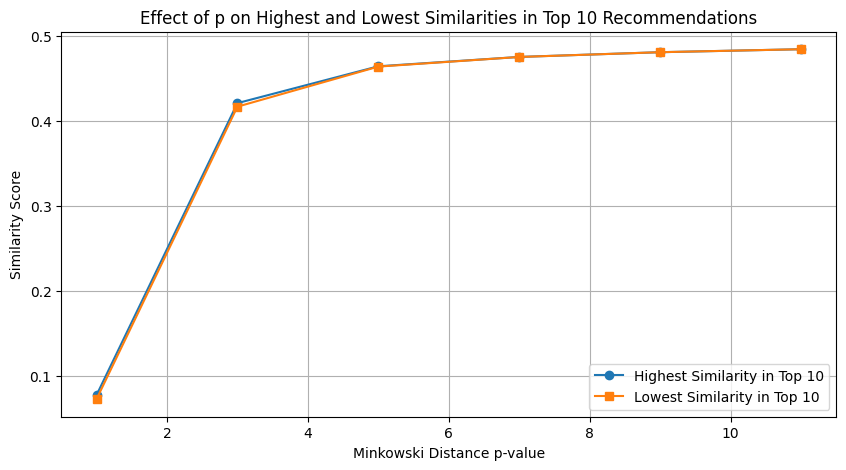

In [74]:
from scipy.spatial.distance import cdist
from difflib import get_close_matches
import numpy as np
import matplotlib.pyplot as plt

# Function to get index of an anime from its title
def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
    if matches:
        title = matches[0]
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

# List of p values to test
p_values = list(range(1, 13, 2))
highest_similarities = []
lowest_similarities = []

try:
    liked_movie_index = get_index_from_title(anime_liked)
    
    for p in p_values:
        # Compute Minkowski Distance for all anime
        similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=p).flatten()
        
        # Sort by increasing distance (lower distance = more similar)
        similar_anime = list(enumerate(similarity_scores))
        similar_anime.sort(key=lambda row: row[1])
        
        # Get top 10 recommendations
        top_10_distances = [similar_anime[i][1] for i in range(1,6)]
        
        # Convert distance to similarity
        top_10_similarities = [1 / (1 + d) for d in top_10_distances]
        
        # Store highest and lowest similarity for the top 10 recommendations
        highest_similarities.append(max(top_10_similarities))
        lowest_similarities.append(min(top_10_similarities))
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(p_values, highest_similarities, marker='o', label='Highest Similarity in Top 10')
    plt.plot(p_values, lowest_similarities, marker='s', label='Lowest Similarity in Top 10')
    plt.xlabel('Minkowski Distance p-value')
    plt.ylabel('Similarity Score')
    plt.title('Effect of p on Highest and Lowest Similarities in Top 10 Recommendations')
    plt.legend()
    plt.grid()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


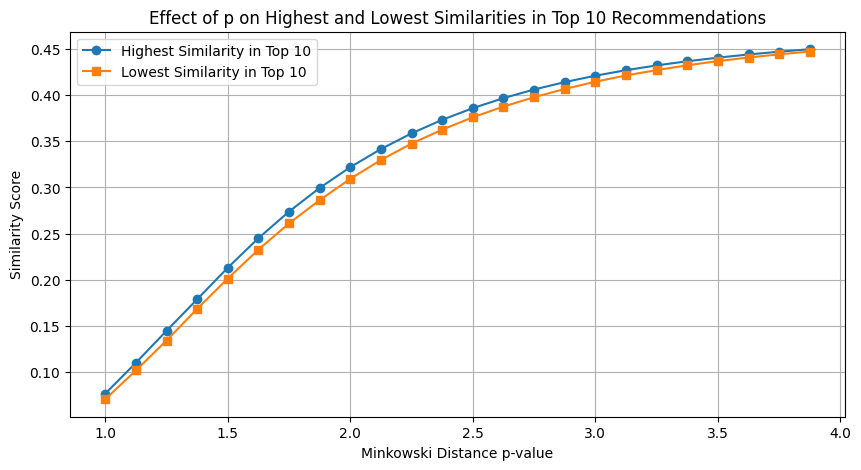

In [ ]:
from scipy.spatial.distance import cdist
from difflib import get_close_matches
import numpy as np
import matplotlib.pyplot as plt

# Function to get index of an anime from its title
def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
    if matches:
        title = matches[0]
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

# List of p values to test
p_values = [1 + (i * 0.125) for i in range(24)]
highest_similarities = []
lowest_similarities = []

try:
    liked_movie_index = get_index_from_title(anime_liked)
    
    for p in p_values:
        # Compute Minkowski Distance for all anime
        similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=p).flatten()
        
        # Sort by increasing distance (lower distance = more similar)
        similar_anime = list(enumerate(similarity_scores))
        similar_anime.sort(key=lambda row: row[1])
        
        # Get top 25 recommendations
        top_25_distances = [similar_anime[i][1] for i in range(1,11)]
        
        # Convert distance to similarity
        top_25_similarities = [1 / (1 + d) for d in top_25_distances]
        
        # Store highest and lowest similarity for the top 25 recommendations
        highest_similarities.append(max(top_25_similarities))
        lowest_similarities.append(min(top_25_similarities))
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(p_values, highest_similarities, marker='o', label='Highest Similarity in Top 10')
    plt.plot(p_values, lowest_similarities, marker='s', label='Lowest Similarity in Top 10')
    plt.xlabel('Minkowski Distance p-value')
    plt.ylabel('Similarity Score')
    plt.title('Effect of p on Highest and Lowest Similarities in Top 10 Recommendations')
    plt.legend()
    plt.grid()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")


In [ ]:
from scipy.spatial.distance import cdist
from difflib import get_close_matches
import numpy as np

# Function to get index of an anime from its title
def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
    if matches:
        title = matches[0]
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

# List of p values to test
p_values = [1 + (i * 0.125) for i in range(26)]

try:
    liked_movie_index = get_index_from_title(anime_liked)
    
    for p in p_values:
        print(f"\n### Recommendations for '{anime_liked}' with Minkowski Distance (p={p}):\n")
        
        # Compute Minkowski Distance for all anime
        similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=p).flatten()
        
        # Sort by increasing distance (lower distance = more similar)
        similar_anime = list(enumerate(similarity_scores))
        similar_anime.sort(key=lambda row: row[1])
        
        # Print top 25 recommendations
        print(f"{'Anime Name':<40} {'Distance':<15} {'Similarity'}")
        print("=" * 70)
        for i in range(1, 11):  # Skip index 0 (it is the liked anime itself)
            anime_name = get_title_from_index(similar_anime[i][0])
            distance = similar_anime[i][1]
            similarity_score = 1 / (1 + distance)  # Convert distance to similarity
            print(f"{anime_name:<40} {distance:<15.4f} {similarity_score:.4f}")

except Exception as e:
    print(f"Error: {e}")



### Recommendations for 'naruto' with Minkowski Distance (p=1.0):

Anime Name                               Distance        Similarity
haikyuu!! to the top: part ii            11.9930         0.0770
the disappearance of nagato yuki-chan    12.0504         0.0766
tokyo ghoul:re 2nd season                12.8048         0.0724
green green thirteen: erolutions         12.8247         0.0723
mushishi zoku shou 2nd season            12.8529         0.0722
armed girl’s machiavellism               12.9150         0.0719
the fruit of grisaia                     13.0097         0.0714
girls und panzer: introductions!         13.0378         0.0712
chiisana viking vickie                   13.0678         0.0711
mashiroiro symphony: the color of lovers 13.0961         0.0709

### Recommendations for 'naruto' with Minkowski Distance (p=1.125):

Anime Name                               Distance        Similarity
haikyuu!! to the top: part ii            8.0638          0.1103
the disappearance of n

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.spatial.distance import minkowski

# # Load your original DataFrame (replace this with your actual DataFrame)
# # df = pd.read_csv("anime_data.csv")  # Ensure the correct file path

# # Select a sample anime (e.g., the first one)
# # query_anime = df.iloc[0, 1:].values  # Assuming first column is anime name, rest are features
# query_anime = anime_liked
# # Range of p values for Minkowski distance
# p_values = np.linspace(1, 10, 10)  # 10 values from 1 to 10

# # Store similarity scores
# similarity_scores = []

# for p in p_values:
#     distances = []
    
#     for i in range(len(df)):
#         anime_features = df.iloc[i, 1:].values  # Skip the name column
#         if not np.array_equal(anime_features, query_anime):  # Avoid self-comparison
#             distance = minkowski(query_anime, anime_features, p)
#             distances.append((i, distance))  # Store index & distance
    
#     # Sorting based on distance
#     distances.sort(key=lambda x: x[1])
    
#     # Take top-3 closest anime and average their similarity score
#     top_similar_anime = distances[:3]
#     avg_similarity = np.mean([1 / (1 + d[1]) for d in top_similar_anime])  # Inverse for similarity
    
#     similarity_scores.append(avg_similarity)

# # Convert to numpy arrays to ensure matching shapes
# p_values = np.array(p_values)
# similarity_scores = np.array(similarity_scores)

# # Plot the similarity changes
# plt.figure(figsize=(8, 5))
# plt.plot(p_values, similarity_scores, marker='o', linestyle='-')
# plt.xlabel("Minkowski Distance Parameter (p)")
# plt.ylabel("Average Similarity Score")
# plt.title("Effect of Minkowski Distance (p) on Anime Similarity")
# plt.grid(True)
# plt.show()


ValueError: Input vector should be 1-D.